In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb


# Data - EDA

Consignas 

* Fill NAs with 0.

* Apply the log tranform to median_house_value.

* Do train/validation/test split with 60%/20%/20% distribution.

* Use the train_test_split function and set the random_state parameter to 1.

* Use DictVectorizer to turn the dataframe into matrices.

In [24]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(url)
df.head().T


,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [25]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
df.fillna(0, inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [27]:
df['median_house_value'] = np.log1p(df['median_house_value'])

## Train Test Val Split

In [28]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train, test_size=len(df_test), random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['median_house_value']
y_val = df_val['median_house_value']
y_test = df_test['median_house_value']


df_train.drop('median_house_value',axis=1, inplace=True)
df_val.drop('median_house_value',axis=1, inplace=True)
df_test.drop('median_house_value',axis=1, inplace=True)

## Df to matrices

In [33]:
dv = DictVectorizer(sparse = False)


In [34]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


c:\Users\ABIGA\Anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [106]:
features = dv.get_feature_names()
features


['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [38]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_val.to_dict(orient='records')
X_test = dv.transform(val_dict)

# Question 1
Let's train a decision tree regressor to predict the median_house_value variable.

* Train a model with max_depth=1.
* Which feature is used for splitting the data?

    * ocean_proximity=INLAND
    * total_rooms
    * latitude
    * population

Decision Tree Regressor

In [42]:
dt = DecisionTreeRegressor(max_depth=1)
model_dt = dt.fit(X_train,y_train)

y_pred_dt = model_dt.predict

In [46]:

print(export_text(model_dt,feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



c:\Users\ABIGA\Anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Question 2

* Train a random forest model with these parameters:

    * n_estimators=10
    * random_state=1
    * n_jobs=-1 (optional - to make training faster)

 

    
* What's the RMSE of this model on validation?

        * 0.05
        * 0.25
        * 0.55
        * 0.85


Random Forest Regressor

In [50]:
rf = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
model_rf = rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_val)

In [52]:
rmse = mean_squared_error(y_val, y_pred, squared=True)
rmse

0.06038733337686411

# Question 3

* Now let's experiment with the n_estimators parameter

    * Try different values of this parameter from 10 to 200 with step 10.
    * Set random_state to 1.
    * Evaluate the model on the validation dataset.
    
<br>

* After which value of n_estimators does RMSE stop improving?

    * 10
    * 50
    * 70
    * 150

In [55]:
scores = []
for estimator in np.arange(10,201,10):
    rf = RandomForestRegressor(n_estimators=estimator,random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=True)
    scores.append((estimator,rmse))

scores

[(10, 0.060387333376864104),
 (20, 0.05724610913439318),
 (30, 0.05556230620118592),
 (40, 0.055029180551008895),
 (50, 0.05433726294739655),
 (60, 0.05421585372008677),
 (70, 0.05400234496108566),
 (80, 0.054068846927262576),
 (90, 0.05392391963627615),
 (100, 0.05380931067467876),
 (110, 0.05360074702925001),
 (120, 0.053648101057890356),
 (130, 0.053689346234333295),
 (140, 0.053681399773269925),
 (150, 0.053682321754479685),
 (160, 0.0536835978702904),
 (170, 0.05365204092043452),
 (180, 0.05372671353830028),
 (190, 0.05371381662704916),
 (200, 0.05366175267952652)]

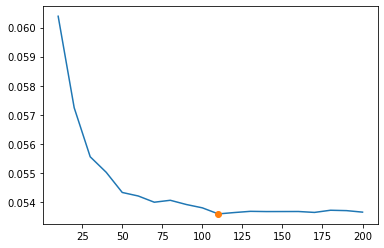

In [72]:
plateu = pd.DataFrame(scores, columns=['estimator','rmse'])
plt.plot(plateu.estimator,plateu.rmse)
plt.plot(110,0.053601,marker='o')
plt.show()


In [75]:
plateu.sort_values('rmse').head(1)

,estimator,rmse
10,110,0.053601


# Question 4
* Let's select the best max_depth:

    * Try different values of max_depth: [10, 15, 20, 25]
    * For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
    * Fix the random seed: random_state=1
    
<BR>

* What's the best max_depth:

    * 10
    * 15
    * 20
    * 25

In [76]:
scores = []
for d in [10,15,20,25]:
    for estimator in np.arange(10,201,10):
        rf = RandomForestRegressor(n_estimators=estimator,max_depth=d,random_state=1,n_jobs=-1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=True)
        scores.append((d,estimator,rmse))



,estimator,rmse
10,110,0.053601


In [77]:
plateu = pd.DataFrame(scores, columns=['max_depth','estimator','rmse'])
plateu.sort_values('rmse').head(1)

,max_depth,estimator,rmse
70,25,110,0.053479


In [85]:
plateu

,max_depth,estimator,rmse
0,10,10,0.065046
1,10,20,0.063900
2,10,30,0.063326
3,10,40,0.063032
4,10,50,0.062596
...,...,...,...
75,25,160,0.053585
76,25,170,0.053565
77,25,180,0.053638
78,25,190,0.053640


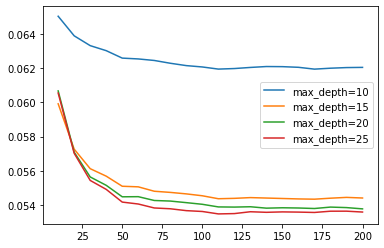

In [91]:
for d in [10,15,20,25]:
    df_subset = plateu[plateu.max_depth == d]
    plt.plot(df_subset.estimator, df_subset.rmse,label ='max_depth=%d' % d)

plt.legend()

# Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * n_estimators=10,
    * max_depth=20,
    * random_state=1,
    * n_jobs=-1 (optional)

* Get the feature importance information from this model

* What's the most important feature?
    * total_rooms
    * median_income
    * total_bedrooms
    * longitude

In [94]:
rf = RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)
#y_pred = rf.predict(X_val)
importances = rf.feature_importances_

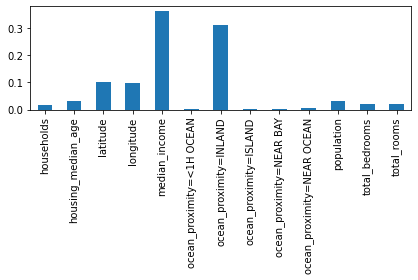

In [97]:
forest_importances = pd.Series(importances, index=features)


fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Question 6
* Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    * Install XGBoost
    * Create DMatrix for train and validation
    * Create a watchlist
    * Train a model with these parameters for 100 rounds:
    
            xgb_params = {
                'eta': 0.3, 
                'max_depth': 6,
                'min_child_weight': 1,
                'objective': 'reg:squarederror',
                'nthread': 8,
                'seed': 1,
                'verbosity': 1,
            }

Now change eta from 0.3 to 0.1.

* Which eta leads to the best RMSE score on the validation dataset?

    * 0.3
    * 0.1
    * Both gives same

In [112]:
features = [w.replace('<', '_less_') for w in features] #porque la DMatrix no acepta cierto tipos de caracteres
features

In [114]:
dtrain = xgb.DMatrix(X_train, label=y_train,feature_names=features)
dval = xgb.DMatrix(X_val, label= y_val, feature_names=features)

In [121]:

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = np.sqrt(float(train_line.split(':')[1]))
        val = np.sqrt(float(val_line.split(':')[1]))

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results




,num_iter,train_rmse,val_rmse
0,0,2.850847,2.851745
1,1,2.386600,2.387614
2,2,1.998847,2.000102
3,3,1.675446,1.676541
4,4,1.406531,1.407746
...,...,...,...
95,95,0.368144,0.475710
96,96,0.366851,0.475605
97,97,0.365677,0.475479
98,98,0.365294,0.475510


In [124]:
watchlist = [(dtrain,'train'),(dval,'val')] # crea una tupla con los conjuntos de train y val
                                            # lo vamos a usar luego al momento de entrenar 
                                            # para evaluar el modelo

In [125]:
%%capture output

xgb_params = {
                'eta': 0.3, 
                'max_depth': 6,
                'min_child_weight': 1,
                'objective': 'reg:squarederror',
                'nthread': 8,
                'seed': 1,
                'verbosity': 1,
            }


model = xgb.train(  xgb_params,
                    dtrain,
                    evals = watchlist, # seteo los conjuntos de train/val que va a utilizar para evaluar cada iteracion
                    #verbose_eval = 5, # imprimo los valores de evaluacion cada 5 pasos
                    num_boost_round=100
                    )

In [126]:
df_score = parse_xgb_output(output)
df_score.sort_values('val_rmse').head(1)

,num_iter,train_rmse,val_rmse
85,85,0.376377,0.475174


In [127]:
%%capture output

xgb_params = {
                'eta': 0.1, 
                'max_depth': 6,
                'min_child_weight': 1,
                'objective': 'reg:squarederror',
                'nthread': 8,
                'seed': 1,
                'verbosity': 1,
            }


model = xgb.train(  xgb_params,
                    dtrain,
                    evals = watchlist, # seteo los conjuntos de train/val que va a utilizar para evaluar cada iteracion
                    #verbose_eval = 5, # imprimo los valores de evaluacion cada 5 pasos
                    num_boost_round=100
                    )

In [128]:
df_score = parse_xgb_output(output)
df_score.sort_values('val_rmse').head(1)

,num_iter,train_rmse,val_rmse
99,99,0.428124,0.480146
